In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
# Reading the dataset
DATA = "Dataset.csv"
data = pd.read_csv(DATA)
print(data)

     Sno     job  education  gender English speaker
0      1  manage         15    male              no
1      2   admin         16    male              no
2      3   admin         12  female              no
3      4   admin          8  female              no
4      5   admin         15    male              no
..   ...     ...        ...     ...             ...
469  470   admin         12    male             yes
470  471   admin         15    male             yes
471  472   admin         15    male              no
472  473   admin         12  female              no
473  474   admin         12  female              no

[474 rows x 5 columns]


In [30]:
data.isnull().sum()

Sno                0
job                0
education          0
gender             0
English speaker    0
dtype: int64

In [31]:
duplicates = data.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
469    False
470    False
471    False
472    False
473    False
Length: 474, dtype: bool


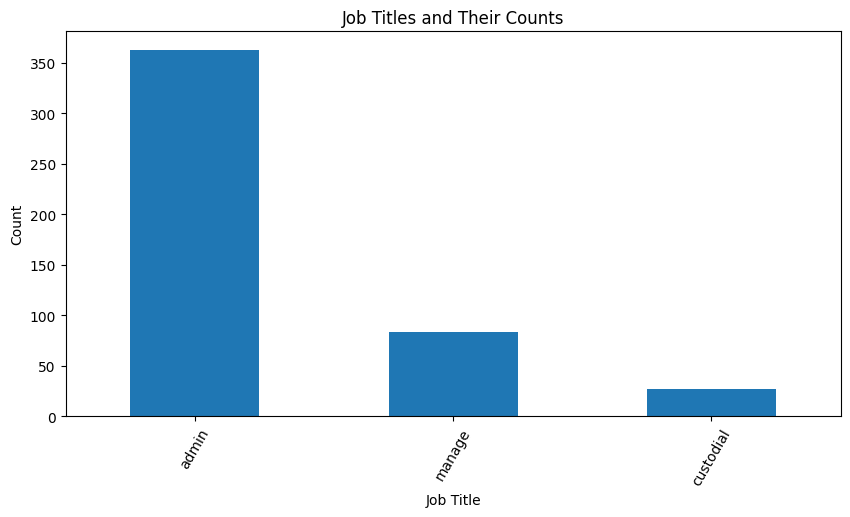

In [32]:
job_titles = data['job']
# Get unique job titles with counts
job_counts = job_titles.value_counts()
# Plot the data
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
job_counts[:].plot(kind='bar')  # Plot the job titles
plt.title('Job Titles and Their Counts')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
# Show the plot
plt.show()

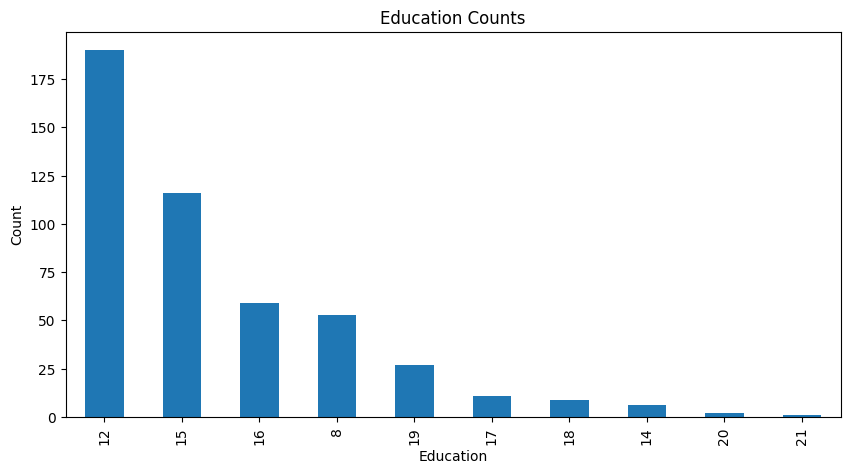

In [33]:
education_num = data['education']
#similar kind of education
education_counts = education_num.value_counts()
# Plot the data
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
education_counts[:].plot(kind='bar')
plt.title('Education Counts')
plt.xlabel('Education')
plt.ylabel('Count')
# Show the plot
plt.show()

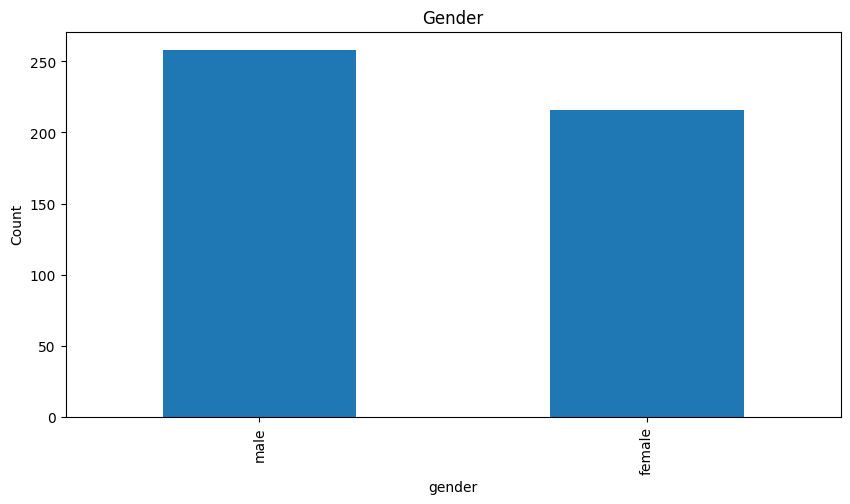

In [34]:
gender_num = data['gender']
#similar gender
gender_counts = gender_num.value_counts()
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
gender_counts[:].plot(kind='bar')
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('Count')
# Show the plot
plt.show()

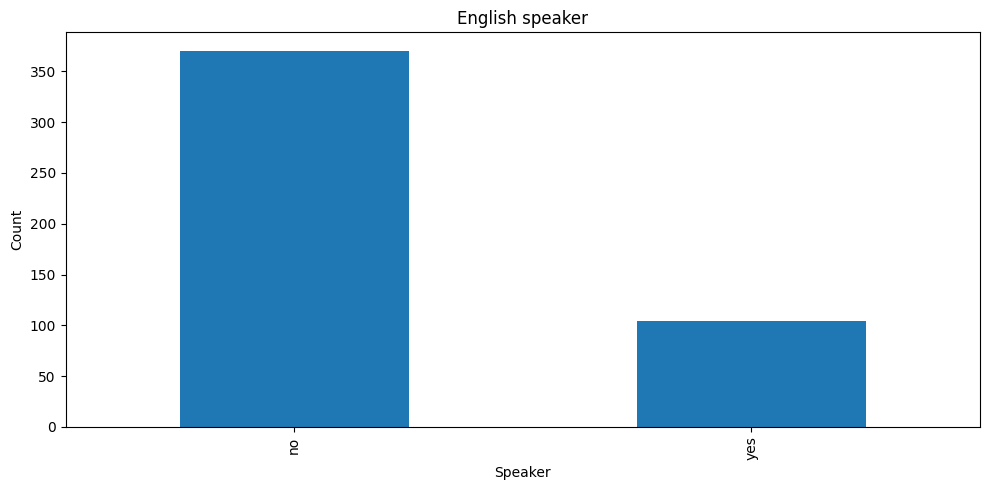

In [35]:
English_speaker_num = data['English speaker']
English_speaker_counts = English_speaker_num.value_counts()
# Plot the data
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
English_speaker_counts[:].plot(kind='bar')
plt.title('English speaker')
plt.xlabel('Speaker')
plt.ylabel('Count')
# Show the plot
plt.tight_layout()
plt.show()

In [36]:
# Calculate percentages for job roles
job_role_percentages = (job_counts / len(data)) * 100
# Print or display the percentages
print("Job Role Percentages:")
print(job_role_percentages)

Job Role Percentages:
job
admin        76.582278
manage       17.721519
custodial     5.696203
Name: count, dtype: float64


In [37]:
education_percentages = (education_counts / len(data)) * 100
# Print or display the percentages
print("education_percentages:")
print(education_percentages)

education_percentages:
education
12    40.084388
15    24.472574
16    12.447257
8     11.181435
19     5.696203
17     2.320675
18     1.898734
14     1.265823
20     0.421941
21     0.210970
Name: count, dtype: float64


In [38]:
gender_percentages = (gender_counts / len(data)) * 100
# Print or display the percentages
print("gender_percentages:")
print(gender_percentages)

gender_percentages:
gender
male      54.43038
female    45.56962
Name: count, dtype: float64


In [39]:
English_speaker_percentages = (English_speaker_counts / len(data)) * 100
# Print or display the percentages
print("English_speaker_percentages:")
print(English_speaker_percentages)

English_speaker_percentages:
English speaker
no     78.059072
yes    21.940928
Name: count, dtype: float64


In [40]:
# Group the data by gender and calculate the mean education level within each group
average_education_by_gender = data.groupby('gender')['education'].mean()
# Print the result
print(average_education_by_gender)

gender
female    12.370370
male      14.430233
Name: education, dtype: float64


<Figure size 1000x600 with 0 Axes>

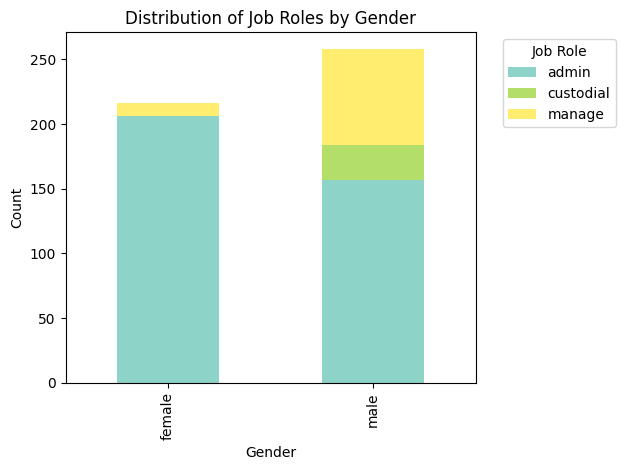

In [41]:
# Pivot the data to create a DataFrame suitable for a stacked bar chart
pivot_data = data.pivot_table(index='gender', columns='job', aggfunc='size', fill_value=0)
# Create a stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, cmap='Set3')
plt.title('Distribution of Job Roles by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Show the chart
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

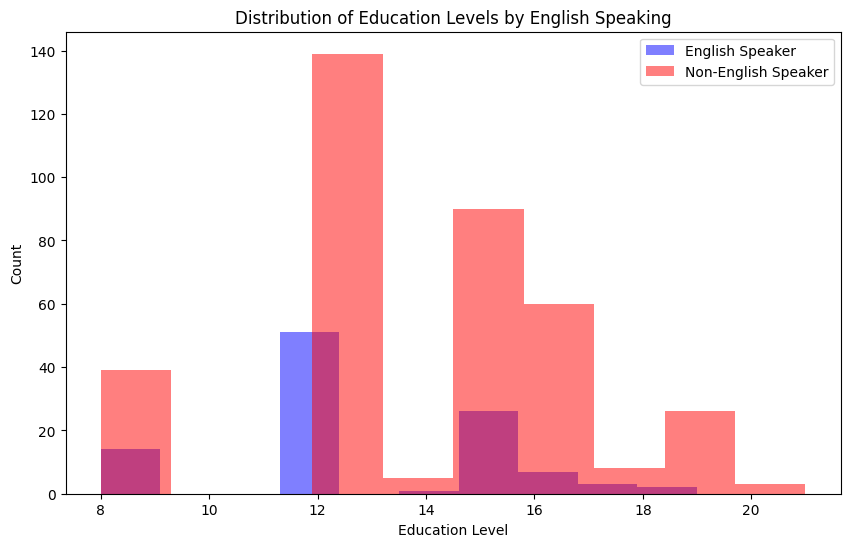

In [42]:
# Filter data for English-speaking individuals
english_speaking_data = data[data['English speaker'] == 'yes']
# Filter data for non-English-speaking individuals
non_english_speaking_data = data[data['English speaker'] == 'no']
# Create histograms for education levels
plt.figure(figsize=(10, 6))
plt.hist(english_speaking_data['education'], bins=10, alpha=0.5, label='English Speaker', color='blue')
plt.hist(non_english_speaking_data['education'], bins=10, alpha=0.5, label='Non-English Speaker', color='red')
plt.title('Distribution of Education Levels by English Speaking')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend()
plt.show()

In [43]:
# Perform one-hot encoding for each categorical variable
data_encoded = pd.get_dummies(data, columns=['job', 'education', 'gender', 'English speaker'], drop_first=True)
data_encoded.to_csv('encoded_dataset2.csv', index=False)

In [44]:
# Reading the dataset
DATA_PATH = "encoded_dataset.csv"
data_encoded = pd.read_csv(DATA_PATH)

In [45]:
# Drop the 'sno' column from the DataFrame
data_encoded = data_encoded.drop('Sno', axis=1)

In [46]:
# Split the data into features (X) and the target variable (y)
X = data_encoded.drop('gender_male', axis=1)  # Exclude 'gender' column from features
y = data_encoded['gender_male']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')



Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-Score: 0.76


In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
# Get feature importances
feature_importances = model.feature_importances_
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print the top N most important features
top_n = 13  # Change this value as needed
print(f'Top {top_n} Most Important Features:')
print(feature_importance_df.head(top_n))

Top 13 Most Important Features:
                Feature  Importance
2          education_12    0.214712
1            job_manage    0.194891
0         job_custodial    0.188071
4          education_15    0.125604
11  English speaker_yes    0.078841
8          education_19    0.061822
3          education_14    0.047277
5          education_16    0.036209
7          education_18    0.027014
6          education_17    0.022023
9          education_20    0.002659
10         education_21    0.000878


In [49]:
from sklearn.inspection import permutation_importance
perm_importances = permutation_importance(model, X, y, n_repeats=30, random_state=42)
# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importances.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Print the top N most important features
top_n = 13  # Change this value as needed
print(f'Top {top_n} Most Important Features (Permutation Importance):')
print(perm_importance_df.head(top_n))

Top 13 Most Important Features (Permutation Importance):
                Feature  Importance
1            job_manage    0.085443
4          education_15    0.076582
0         job_custodial    0.052180
2          education_12    0.048875
11  English speaker_yes    0.020816
3          education_14    0.011392
8          education_19    0.006259
7          education_18    0.003024
6          education_17    0.000774
5          education_16    0.000000
9          education_20    0.000000
10         education_21    0.000000


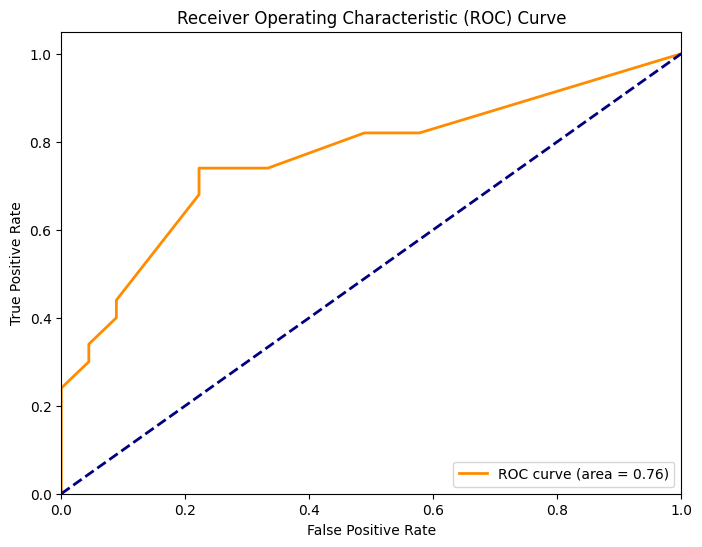

AUC Score: 0.76


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
model = LogisticRegression()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
# Visualize the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {auc_score:.2f}')
